In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [ ]:
df=pd.read_csv("homeprices.csv")
df

,Area,Price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


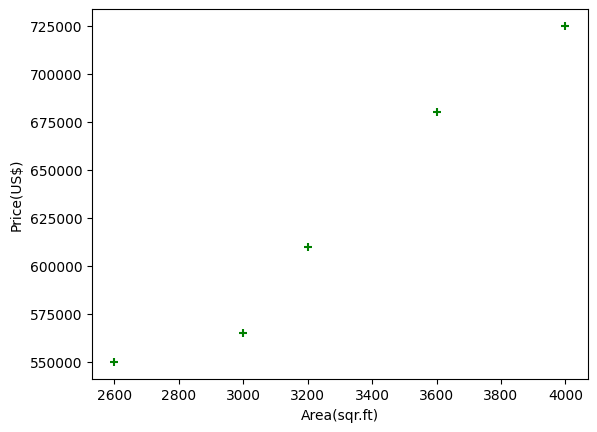

In [ ]:
plt.xlabel('Area(sqr.ft)')
plt.ylabel('Price(US$)')
plt.scatter(df.Area,df.Price,color='green',marker='+')

In [ ]:
reg=LinearRegression()
reg.fit(df[['Area']],df.Price)

LinearRegression()

In [ ]:
reg.predict([[3400]])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([642294.52054795])

In [ ]:
reg.intercept_


np.float64(180616.43835616432)

In [ ]:
reg.coef_

array([135.78767123])

In [ ]:
135.787 * 3400 + 180616.4383

642292.2383000001

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,cross_val_score

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.datasets import fetch_california_housing

In [ ]:
data= fetch_california_housing()
X=pd.DataFrame(data.data,columns=data.feature_names)
X

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [ ]:
y=pd.DataFrame(data.target,columns=['HousePrice'])
print(y.head()) #target values

   HousePrice
0       4.526
1       3.585
2       3.521
3       3.413
4       3.422


In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
scaler= StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [ ]:
model=LinearRegression()
model.fit(X_train_scaled,y_train)

LinearRegression()

In [ ]:
y_pred=model.predict(X_test_scaled)

In [ ]:
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print(f'\nmean squarederror(mse):{mse:2f}')
print(f'R-squard (R2 score):{r2:2f}')



mean squarederror(mse):0.555892
R-squard (R2 score):0.575788


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

dataset=pd.read_csv('50_Startups.csv')
X= dataset.iloc[:,:-1].values
y= dataset.iloc[:,-1].values
dataset.head(5)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
ct=ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[3])],remainder='passthrough')
X=np.array(ct.fit_transform(X))

In [ ]:
from sklearn.model_selection import  train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [ ]:
from sklearn.linear_model import LinearRegression
regrssor=LinearRegression()
regrssor.fit(X_train,y_train)

LinearRegression()

In [ ]:
y_pred=regrssor.predict(X_test)

In [ ]:
df=pd.DataFrame({'real values':y_test,'predicated value:':y_pred})
df

,real values,predicated value:
0,14681.40,51540.291697
1,110352.25,116717.295596
2,71498.49,73308.202076
3,96778.92,99137.236745
4,97483.56,98828.388253
5,105008.31,117580.670551
6,69758.98,62288.428857
7,111313.02,120302.539553
8,108733.99,111820.967777
9,144259.40,135226.910498
